<a href="https://colab.research.google.com/github/smarulandas/samuel-Marualanda/blob/main/Tranformada_Z_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install yt-dlp
#!python3 -m pip install --force-reinstall https://github.com/yt-dlp/yt-dlp/archive/master.tar.gz

In [ ]:
!pip install soundfile

# para instalar pip install soundfile

#librerias
from IPython.display import Audio
import soundfile as sf

In [ ]:
link="https://www.youtube.com/watch?v=2lbNboSDgKU"
!yt-dlp --extract-audio -o "audio" --audio-format mp3 {link}

!ffmpeg -i audio.mp3 out.wav
#lee archivos wav
nombre_out = "out.wav"
x, fs = sf.read(nombre_out)


[youtube] Extracting URL: https://www.youtube.com/watch?v=2lbNboSDgKU
[youtube] 2lbNboSDgKU: Downloading webpage
[youtube] 2lbNboSDgKU: Downloading tv client config
[youtube] 2lbNboSDgKU: Downloading player f6e09c70
[youtube] 2lbNboSDgKU: Downloading tv player API JSON
[youtube] 2lbNboSDgKU: Downloading ios player API JSON
[youtube] 2lbNboSDgKU: Downloading m3u8 information
[info] 2lbNboSDgKU: Downloading 1 format(s): 251
[download] audio.mp3 has already been downloaded
[ExtractAudio] Not converting audio audio.mp3; file is already in target format mp3
ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enab

In [ ]:
# read speech signal from file
print('Frecuencia de muestreo %.2f[Hz]\naudio %s' % (fs,nombre_out))

x.shape[0]/fs #segundos de la canción

xpro = x.copy() #copiar archivos para procesar
ti = 30
tf = 50
xs = xpro[int(ti*fs):int((tf*fs)),:]

#Para escuchar el trozo de audio con el que se va a trabajar:
#No usar un trozo muy grande o el entorno se puede desconectar

Audio([xs[:,1], xs[:,0]],rate=fs)

Frecuencia de muestreo 48000.00[Hz]
audio out.wav


Ingrese la frecuencia de corte baja (Hz): 3000
Ingrese la frecuencia de corte alta (Hz): 5000
seleccione el tipo de filtro que desea para la señal:
 0.Butterworth
 1.Chebyshev 1
 2.Chebyshev 2
 3.eliptico
 4.Bessel
 5.Firwim
4


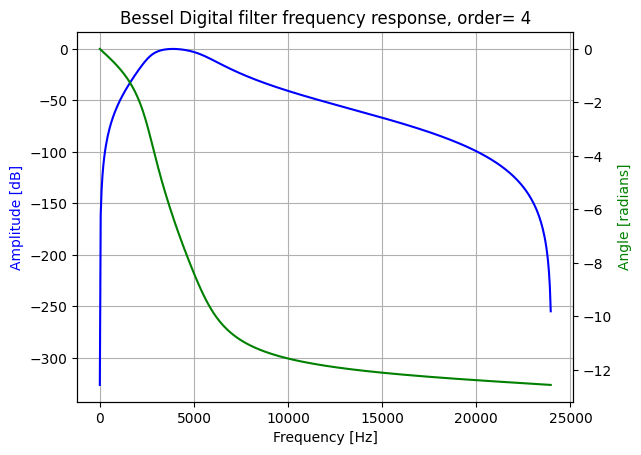

In [ ]:
from scipy.signal import butter, cheby1,cheby2, ellip, bessel, firwin
from scipy.signal import freqz_zpk, freqz
import matplotlib.pyplot as plt
import numpy as np

def plot_freq_response(filter_name, w, h, N): #Mostrar la respuesta en frecuencia del filtro
  fig = plt.figure()
  ax1 = fig.add_subplot(1, 1, 1)
  ax1.set_title(filter_name +' Digital filter frequency response, order= ' + str(N))
  ax1.plot(w, 20 * np.log10(abs(h)), 'b')
  ax1.set_ylabel('Amplitude [dB]', color='b')
  ax1.set_xlabel('Frequency [Hz]')
  ax1.grid()
  ax2 = ax1.twinx()
  angles = np.unwrap(np.angle(h))
  ax2.plot(w, angles, 'g')
  ax2.set_ylabel('Angle [radians]', color='g')
  plt.axis('tight')
  plt.show()



def bandpass_filter(fs, fmin, fmax, design):
  Wn=[fmin,fmax]
  filt='bandpass'
  if design == 0:
    #butterworth
    type_f = 'Butterworth'
    N=1
    out='zpk'
    zeros, poles, gain = butter(N, Wn, btype=filt, output=out, fs=fs)
    w, h = freqz_zpk(zeros, poles, gain, fs=fs)
    plot_freq_response(type_f, w, h, N)

  elif design == 1:
    #Chebyshev 1
    type_f = 'Chebyshev 1'
    ripple = 10
    N= 4
    out='zpk'
    zeros, poles, gain = cheby1(N, rp=ripple, Wn=Wn,btype=filt, output=out, fs=fs)
    w, h = freqz_zpk(zeros, poles, gain, fs=fs)
    plot_freq_response(type_f, w, h, N)

  elif design == 2:
    #Chebyshev 2
    N = 4
    type_f = 'Chebyshev 2'
    ripple = 10
    out='ba'
    num, den = cheby2(N, rs=ripple, Wn=Wn,btype=filt, output=out, fs=fs)
    w, h = freqz(num,den, fs=fs)
    plot_freq_response(type_f, w, h, N)

  elif design == 3:
    #eliptico
    N = 4
    type_f = 'eliptico'
    out='ba'
    ripple_pass = 2 #para la banda pasante
    ripple_stop = 30 #para la banda rechazada
    num, den = ellip(N, rp=ripple_pass, rs=ripple_stop, Wn=Wn, btype=filt, output=out, fs=fs) #regresa numerador y denominador. Si se quiere obtener los polos y ceros usar scipy.signal.tf2zpk
    w, h = freqz(num, den, fs=fs)
    plot_freq_response(type_f, w, h, N)

  elif design==4:
    #bessel
    type_f = 'Bessel'
    N = 4
    normalization = 'mag' #Ajusta la frecuencia crítica según la respuesta que se desea
    out = 'ba'
    num, den = bessel(N, Wn=Wn, btype=filt, norm=normalization, output=out, fs=fs) #regresa numerador y denominador. Si se quiere obtener los polos y ceros usar scipy.signal.tf2zpk
    w, h = freqz(num, den, fs=fs)
    plot_freq_response(type_f, w, h, N)

  elif design == 5:
    #firwin
    type_f = 'FIRWIN'
    numtaps = 101  # Número de coeficientes del filtro (orden + 1)
    b = firwin(numtaps, [fmin, fmax], pass_zero=False, fs=fs)
    # Respuesta en frecuencia del filtro
    w, h = freqz(b, worN=1024, fs=fs)
    plt.figure(figsize=(8, 4))
    plt.plot(w, 20 * np.log10(abs(h)))
    plt.title("Respuesta en Frecuencia del Filtro FIR Pasabanda")
    plt.xlabel("Frecuencia (Hz)")
    plt.ylabel("Magnitud (dB)")
    plt.grid()
    plt.show()


fc_baja=float(input("Ingrese la frecuencia de corte baja (Hz): "))
fc_alta = float(input("Ingrese la frecuencia de corte alta (Hz): "))
flt_typ=int(input("seleccione el tipo de filtro que desea para la señal:\n 0.Butterworth\n 1.Chebyshev 1\n 2.Chebyshev 2\n 3.eliptico\n 4.Bessel\n 5.Firwim\n"))

bandpass_filter(fs, fc_baja, fc_alta, flt_typ)



2. Consulte en qué consiste el método de diseño de filtros FIR por ventaneo (Ver función firwin y material de apoyo). Realice un cuadro comparativo de las ventajas y desventajas de los filtros IIR y los FIR. Nota: Recuerde que un filtro FIR utiliza solamente raíces tipo ceros, es decir que  a0=1 , y  ak=0   ∀k∈{1,2,…} .

In [ ]:
from tabulate import tabulate

tabla = [
    ["Estructura", "Solo tienen ceros (coeficientes de retroalimentación nulos).", "Tienen polos y ceros (pueden realimentarse)."],
    ["Estabilidad", "Siempre son estables.", "Pueden ser inestables si los polos no están dentro del círculo unitario."],
    ["Retardo de grupo", "Constante, lo que significa que no distorsionan la fase.", "Puede no ser constante, causando distorsión de fase."],
    ["Orden del filtro", "Generalmente requieren un orden alto para lograr una buena respuesta.", "Pueden lograr una respuesta similar con un orden menor."],
    ["Eficiencia computacional", "Suelen ser más costosos computacionalmente debido a su mayor orden.", "Más eficientes en términos de cómputo debido a su menor orden."],
    ["Método de diseño", "Métodos basados en ventanas, optimización o frecuencias de muestreo.", "Métodos basados en transformaciones analógicas-digitales (Butterworth, Chebyshev, etc.)."],
    ["Aplicaciones", "Útiles en aplicaciones que requieren respuesta de fase lineal (audio, imagen, telecomunicaciones).", "Usados en aplicaciones donde la eficiencia es clave y no se requiere fase lineal (procesamiento de señales en tiempo real)."]
]

# Mostrar la tabla en formato bonito
print(tabulate(tabla, headers=["Característica", "Filtros FIR", "Filtros IIR"], tablefmt="grid"))


+--------------------------+----------------------------------------------------------------------------------------------------+-----------------------------------------------------------------------------------------------------------------------------+
| Característica           | Filtros FIR                                                                                        | Filtros IIR                                                                                                                 |
+==========================+====================================================================================================+=============================================================================================================================+
| Estructura               | Solo tienen ceros (coeficientes de retroalimentación nulos).                                       | Tienen polos y ceros (pueden realimentarse).                                                          

3. Incluya la implementación del filtro firwin en el punto 1.